# CNN: Fashion-MNIST 

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:


| Label |	Description|
|---|------------------|
| 0 |	T-shirt/top    |
| 1 |	Trouser        |
| 2 |	Pullover       |
| 3 |	Dress          |
| 4 |	Coat           |
| 5 |	Sandal         |
| 6 |	Shirt          |
| 7 |	Sneaker        |
| 8 |	Bag            |
| 9 |	Ankle boot     |

See [keras docs](https://keras.io/datasets/).

In this exercise we will train a CNN on the dataset.
The [solution](../solutions/CNN.ipynb) is in the `solutions` folder.

We'll get the data via [`keras.datasets`](https://keras.io/datasets/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import jax
import keras
print('Keras:', keras.__version__, 'backend:', keras.backend.backend(), jax.default_backend())

Keras: 3.6.0 backend: jax cpu


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

We need to convert the images to a float32 between 0 and 1 and reshape to 28x28x1 (only one channel for black and white) because 2D convolutions expect 3D images (3rd dimension is channel or image).

We also need to one-hot encode the labels.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
num_classes = y_test.shape[1]

Let's see the images.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


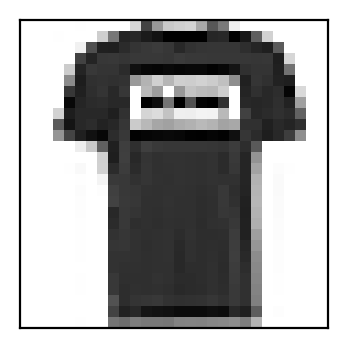

In [5]:
i = 1
plt.figure(figsize=(2,2))
plt.imshow(x_train[i, :, :, 0], cmap='gray_r')
plt.xticks([]); plt.yticks([])
print(y_train[i])

Now build and train the CNN.
When I trained a CNN I got this accuracy of ~87% on the test set, see if you can top it.

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Save model
model.save('../data/keras_cnn_fashion_model.keras')